In [1]:
import scipy.ndimage as ndi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pims
#import time
#import csv
import skimage
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
import scipy.spatial
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [3]:
#IN = pd.read_csv('./INPosition.csv', skiprows= 3)
#pqbp1 = pd.read_csv('./INPQBP1Position.csv', skiprows= 3)
#cgas = pd.read_csv('./INcGASPosition.csv', skiprows= 3)
#triple = pd.read_csv('./TriplePosition.csv', skiprows=3)

#f_pqbp1 = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/PQBP1_Image_1_Statistics/Position.csv"
#f_IN = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/IN_Image_1_Statistics/Position.csv"
#f_cgas = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/cGAS_Image_1_Statistics/Position.csv"
#f_triple = "/media/agulhas/N74DOMXTHP1/plate3wt/fix/tif/Imaris/Triple_Image_1_Statistics/Position.csv"

# df = pd.read_hdf('/home/jmamede/Data/D116N/stored_data_trackpy_AG3.h5')
vcps = pd.read_hdf('/run/media/jmamede/Joao/till/fixed40x/prj/stored_data_trackpy_VCP.h5')
viruses = pd.read_hdf('/run/media/jmamede/Joao/till/fixed40x/prj/stored_data_trackpy_INtegrase.h5')
#triple = pd.read_csv(f_triple, skiprows=3)
print(viruses['VisitP'].unique())
print(viruses['Filename'].unique())


['lA01' 'lA02' 'lA03' 'lA04' 'lA05' 'lA06' 'lA07' 'lA08' 'lB01' 'lB02'
 'lB03' 'lB04' 'lB05' 'lB06' 'lB07' 'lB08' 'lC01' 'lC02' 'lC03' 'lC04'
 'lC05' 'lC06' 'lC07' 'lC08']
['/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v10_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v1_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v2_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v3_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v4_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v5_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v6_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v7_PRJ.ome.t

In [4]:
INsubset = viruses[viruses['Filename'] == '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v6_PRJ.ome.tiff']
VCPsubset = vcps[vcps['Filename'] =='/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v6_PRJ.ome.tiff']

In [5]:
print(INsubset['COMX mRuby'])
INcount = INsubset.index.max()+1
print(VCPsubset['COMX GFP'])
VCPcount = VCPsubset.index.max()+1

2933     233.893453
2934    1301.920848
2935    1313.027959
2936     216.966007
2937      23.934116
           ...     
3721     820.148394
3722    1819.984436
3723     752.155458
3724      40.966092
3725     821.953797
Name: COMX mRuby, Length: 793, dtype: float64
408    1314.894936
409    1332.952272
410    1302.028232
411    1423.047307
412    1454.067328
          ...     
502     331.000371
503    1705.041522
504    1529.031975
505     989.033528
506    1080.963569
Name: COMX GFP, Length: 99, dtype: float64


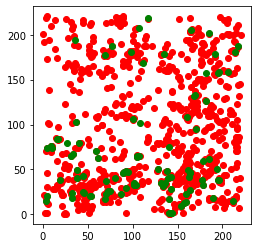

In [7]:
%matplotlib inline

fig = plt.figure()

#pixelsize of PCO edge
psize = 0.1081811
# zsize = 0.125

# ax = plt.axes(projection='3d')
# ax.scatter3D(IN['Position X']*psize,IN['Position Y']*psize,IN['Position Z']*zsize, color='red')
# ax.scatter3D(pqbp1['Position X']*psize,pqbp1['Position Y']*psize,pqbp1['Position Z']*zsize, color='green')

ax = plt.axes()
ax.scatter(INsubset['COMX mRuby']*psize,INsubset['COMY mRuby']*psize, color='red')

ax.scatter(VCPsubset['COMX GFP']*psize,VCPsubset['COMY GFP']*psize, color='green')
ax.axes.set_aspect('equal')

In [8]:
#
psize = 0.1081811
# zsize = 0.125
INpos = zip(INsubset['COMX mRuby']*psize,INsubset['COMY mRuby']*psize)

VCPpos = zip(VCPsubset['COMX GFP']*psize,VCPsubset['COMY GFP']*psize)
# cgas_pos = zip(cgas['Position X']*psize ,IN['Position Y']*psize ,IN['Position Z']*zsize )
# triple_pos = zip(triple['Position X']*psize ,triple['Position Y']*psize ,triple['Position Z']*0.2)

INpos = list(INpos)
VCPpos = list(VCPpos)
# zipped_list = test2[:]
# zipped_list_2 = list(test2)
#Nearest Neighbor Brute Force - I used 5 pixels for max distance in imaris
IN_kd = scipy.spatial.cKDTree(INpos,leafsize=10000)
VCP_closest = np.asarray(IN_kd.query(VCPpos,p=2,
                #distance_upper_bound=10*psize
                ))[0]





/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


(0.0, 3.0)

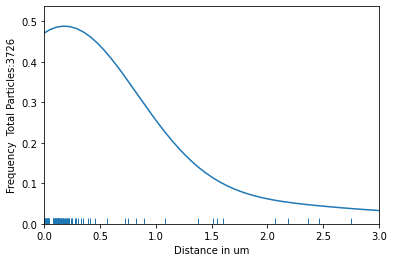

In [9]:
%matplotlib inline
label = 'VCP count:'+ str(VCPcount) + '\n IN count:' + str(INcount) 
ax = sns.distplot(VCP_closest, hist=False, rug=True,label=label)

#ax = sns.distplot(triple_closest, hist=False, rug=True, label='triple for control')
#plt.yscale('log', nonposy='clip')
ax.set(xlabel='Distance in um', ylabel='Frequency'
       + '  Total Particles:' + str(INcount)
       #,xscale="log"
       #,yscale="log"
       
      )
ax.set_xlim(0,3)

# print("Total IN:",in_count)
# print("Percentage PQBP1", pqbp1_count/float(in_count)*100, "%")
# print("Percentage Triple", triple_count/float(in_count)*100, "%")
# print("IN+cGAS without PQBP1", cgas_count/float(in_count)*100 - triple_count/float(in_count)*100 , "%")

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


(0.0, 3.0)

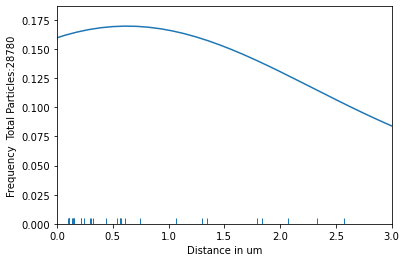

In [10]:
INsubset = viruses[viruses['Filename'] == '/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v10_PRJ.ome.tiff']
VCPsubset = vcps[vcps['Filename'] =='/run/media/jmamede/Joao/till/fixed40x/prj/WellA04_Channela647,mRuby,GFP,DAPI_Seq0003_v10_PRJ.ome.tiff']
# print(INsubset['COMX mRuby'])
INcount = INsubset.index.max()+1
# print(VCPsubset['COMX GFP'])
VCPcount = VCPsubset.index.max()+1
#
psize = 0.1081811
# zsize = 0.125
INpos = zip(INsubset['COMX mRuby']*psize,INsubset['COMY mRuby']*psize)

VCPpos = zip(VCPsubset['COMX GFP']*psize,VCPsubset['COMY GFP']*psize)
# cgas_pos = zip(cgas['Position X']*psize ,IN['Position Y']*psize ,IN['Position Z']*zsize )
# triple_pos = zip(triple['Position X']*psize ,triple['Position Y']*psize ,triple['Position Z']*0.2)

INpos = list(INpos)
VCPpos = list(VCPpos)
# zipped_list = test2[:]
# zipped_list_2 = list(test2)
#Nearest Neighbor Brute Force - I used 5 pixels for max distance in imaris
IN_kd = scipy.spatial.cKDTree(INpos,leafsize=10000)
VCP_closest = np.asarray(IN_kd.query(VCPpos,p=2,
                #distance_upper_bound=10*psize
                ))[0]


%matplotlib inline
label = 'VCP count:'+ str(VCPcount) + '\n IN count:' + str(INcount) 
ax = sns.distplot(VCP_closest, hist=False, rug=True,label=label)

#ax = sns.distplot(triple_closest, hist=False, rug=True, label='triple for control')
#plt.yscale('log', nonposy='clip')
ax.set(xlabel='Distance in um', ylabel='Frequency'
       + '  Total Particles:' + str(INcount)
       #,xscale="log"
       #,yscale="log"
       
      )
ax.set_xlim(0,3)

In [11]:
print(viruses['VisitP'].unique())
print(viruses['Filename'].unique())


# for ficheiro in viruses['Filename'].unique():
    
    

['lA01' 'lA02' 'lA03' 'lA04' 'lA05' 'lA06' 'lA07' 'lA08' 'lB01' 'lB02'
 'lB03' 'lB04' 'lB05' 'lB06' 'lB07' 'lB08' 'lC01' 'lC02' 'lC03' 'lC04'
 'lC05' 'lC06' 'lC07' 'lC08']
['/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v10_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v1_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v2_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v3_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v4_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v5_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v6_PRJ.ome.tiff'
 '/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v7_PRJ.ome.t

In [12]:
import math
dual = list()
filelist = list()
print('File,IN,VCP,dual')
for ficheiro in viruses['Filename'].unique():

    INsubset = viruses[viruses['Filename'] == ficheiro]
    VCPsubset = vcps[vcps['Filename'] == ficheiro]

    INcount = len(INsubset)
    VCPcount = len(VCPsubset)
    


    
    psize = 0.1081811
    # zsize = 0.125

    INpos = zip(INsubset['COMX mRuby']*psize,INsubset['COMY mRuby']*psize)
    VCPpos = zip(VCPsubset['COMX GFP']*psize,VCPsubset['COMY GFP']*psize)
    INpos = list(INpos)
    VCPpos = list(VCPpos)
    if math.isnan(VCPcount) or math.isnan(INcount):
        if math.isnan(VCPcount):
            VCPcount = 0
            VCP_closest = []
        elif math.isnan(INcount):
            INcount = 0
    else:
#         print(INcount,VCPcount)
        try:
# Nearest Neighbor Brute Force - I used 5 pixels for max distance in imaris
            IN_kd = scipy.spatial.cKDTree(INpos,leafsize=10000)
            VCP_closest = np.asarray(IN_kd.query(VCPpos,p=2,k=1
        #                     distance_upper_bound=5*psize
                            ))[0]
            VCP_5pixels = VCP_closest[VCP_closest < 0.5]
            #

            print('{0},{1},{2},{3}'.format(ficheiro,INcount,VCPcount,len(VCP_5pixels)))
            dual.append(VCP_5pixels)
            filelist.append(ficheiro)
        except: print(ficheiro,'¯\_(ツ)_/¯ ')
    #in_list.append(INpos)
    
    


File,IN,VCP,dual
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v10_PRJ.ome.tiff,1314,159,123
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v1_PRJ.ome.tiff,101,7,3
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v2_PRJ.ome.tiff,149,27,14
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v3_PRJ.ome.tiff,583,95,71
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v4_PRJ.ome.tiff,291,47,31
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v5_PRJ.ome.tiff,495,73,55
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v6_PRJ.ome.tiff,793,99,76
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v7_PRJ.ome.tiff,507,81,64
/run/media/jmamede/Joao/till/fixed40x/prj/WellA01_Channela647,mRuby,GFP,DAPI_Seq0000_v8_PRJ.o

/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v4_PRJ.ome.tiff,75,8,8
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v5_PRJ.ome.tiff,213,107,56
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v6_PRJ.ome.tiff,625,66,48
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v7_PRJ.ome.tiff,413,34,25
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v8_PRJ.ome.tiff,761,120,81
/run/media/jmamede/Joao/till/fixed40x/prj/WellB01_Channela647,mRuby,GFP,DAPI_Seq0009_v9_PRJ.ome.tiff,676,55,47
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v10_PRJ.ome.tiff,1091,59,47
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v1_PRJ.ome.tiff,70,10,7
/run/media/jmamede/Joao/till/fixed40x/prj/WellB02_Channela647,mRuby,GFP,DAPI_Seq0008_v2_PRJ.ome.tiff,1,1,0
/run/m

/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v5_PRJ.ome.tiff,560,56,45
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v6_PRJ.ome.tiff,1067,240,137
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v7_PRJ.ome.tiff,774,101,46
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v8_PRJ.ome.tiff,383,40,28
/run/media/jmamede/Joao/till/fixed40x/prj/WellC01_Channela647,mRuby,GFP,DAPI_Seq0010_v9_PRJ.ome.tiff,463,46,33
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v10_PRJ.ome.tiff,727,71,46
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v1_PRJ.ome.tiff,161,15,8
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v2_PRJ.ome.tiff,91,3,2
/run/media/jmamede/Joao/till/fixed40x/prj/WellC02_Channela647,mRuby,GFP,DAPI_Seq0011_v3_PRJ.ome.tiff,448,52,44


In [14]:
len(dual[0][dual[0] < 5*psize])


123

In [13]:
# %matplotlib qt5

# for i in range(len(filelist)):
# #     label = 'VCP count:'+ str(VCPcount) + '\n IN count:' + str(INcount) 
#     ax = sns.distplot(dual[i], hist=False, rug=True,label=label)

#     #ax = sns.distplot(triple_closest, hist=False, rug=True, label='triple for control')
#     #plt.yscale('log', nonposy='clip')
# ax.set(xlabel='Distance in um', ylabel='Frequency'
#        + '  Total Particles:' + str(INcount)
#        #,xscale="log"
#        #,yscale="log"

#       )
# ax.set_xlim(0,1)

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmame

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wil

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wil

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wil

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seab

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wil

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmame

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wil

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wil

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmame

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wil

/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/jmamede/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wil

(0.0, 1.0)